# Lending Club Case Study


## Import important library

In [114]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import re as re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go





## Import LendingClub Data And Verify Data

In [115]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
global lc

lc  = pd.read_csv('C:\\Users\durganayak\\OneDrive - Microsoft\\Documents\\ML_AI_Learning\\Workspace\\CodeRepo\\LendingClub\\loan.csv')

lc.head()

C:\Users\durganayak\AppData\Local\Temp\ipykernel_40016\2010620028.py:5: DtypeWarning:

Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Data Handling and Cleaning

### Missing Values 

In [116]:
print(lc.shape)
lc.info(verbose=True,  show_counts=True)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   hom


### drop null columns


In [117]:
lc.dropna(how='all', axis=1, inplace=True)
lc.info(verbose=True,  show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [118]:
print(lc.isnull().sum())


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Drop columns missing more than 70% of the data


In [119]:
print(lc.columns[lc.isnull().mean() > 0.70])
lc.drop(lc.columns[lc.isnull().mean() > 0.70], axis=1,  inplace=True)
# print(lc.shape)
print(lc.info())

Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership        

### Analyze Lending Club Attributes With Domain Knowledge

In [120]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

lc.describe()

# lc.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1).loc['loan_status']
# data[data.columns[1:]].corr()['loan_status'][:-1]
# lc.corr().loc['loan_status']
#lc.columns
#draw corr heatmap

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


### After analyzing the variables there are basically three different kinds of variables 
####    1.  Variables related to the applicant  (e.g home_ownership)
####     2.  Variables related to loan characterstics (e.g loan_amnt	funded_amnt	funded_amnt_inv	)
####     3. Behavioural variables genarated after loan (e.g delinq_2yrs)

#### Since behavioural attributes are absent at the time of loan application, hence those variables can not be used for prediction.

#### Drop Behaviural Attributes

In [121]:
 lc.columns
# drop behavioural attributes
lc.drop(['delinq_2yrs',
                 'earliest_cr_line',
                 'inq_last_6mths',
                 'open_acc',
                 'pub_rec',
                 'revol_bal',
                 'revol_util',
                 'total_acc',
                 'out_prncp',
                 'out_prncp_inv',
                 'total_pymnt',
                 'total_pymnt_inv',
                 'total_rec_prncp',
                 'total_rec_int',
                 'total_rec_late_fee',
                 'recoveries',
                 'collection_recovery_fee',
                 'last_pymnt_d',
                 'last_pymnt_amnt',
                 'last_credit_pull_d',
                 'delinq_amnt',
                 'chargeoff_within_12_mths',
                 'acc_now_delinq',
                 'collections_12_mths_ex_med',
                 'mths_since_last_delinq'
                ], axis=1, inplace=True)

# lc.head()

In [122]:
lc.apply(lambda x : pd.factorize(x)[0]).describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,initial_list_status,policy_code,application_type,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0,39717.0,39717.0,39717.000000,39717.000000
mean,19858.000000,19858.000000,78.881688,104.658484,1096.210212,0.267417,108.484881,6700.507415,1.747891,11.521918,11723.160737,3.855352,0.973941,555.874865,1.103532,12.881008,0.199084,0.0,19858.000000,8879.151270,4.320442,5336.286250,211.140872,12.290581,1214.207317,0.0,0.0,0.0,0.024952,-0.000982
std,11465.454657,11465.454657,134.210998,179.977949,1982.365012,0.442617,83.923663,4546.003426,1.690579,7.466759,8914.548612,3.476979,0.964550,1105.356434,0.858979,10.993449,0.465683,0.0,11465.454657,8845.410017,2.480870,6156.575709,174.630800,9.784694,748.645137,0.0,0.0,0.0,0.244502,0.031321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-1.000000,-1.000000
25%,9929.000000,9929.000000,9.000000,9.000000,24.000000,0.000000,38.000000,3003.000000,0.000000,5.000000,3357.000000,0.000000,0.000000,23.000000,0.000000,4.000000,0.000000,0.0,9929.000000,-1.000000,3.000000,117.000000,76.000000,3.000000,573.000000,0.0,0.0,0.0,0.000000,0.000000
50%,19858.000000,19858.000000,32.000000,35.000000,183.000000,0.000000,106.000000,6496.000000,1.000000,12.000000,10623.000000,3.000000,1.000000,77.000000,1.000000,10.000000,0.000000,0.0,19858.000000,6704.000000,5.000000,2200.000000,162.000000,11.000000,1170.000000,0.0,0.0,0.0,0.000000,0.000000
75%,29787.000000,29787.000000,80.000000,97.000000,888.000000,1.000000,173.000000,10531.000000,2.000000,17.000000,19320.000000,7.000000,2.000000,362.000000,2.000000,19.000000,0.000000,0.0,29787.000000,16625.000000,5.000000,10028.000000,315.000000,17.000000,1808.000000,0.0,0.0,0.0,0.000000,0.000000
max,39716.000000,39716.000000,884.000000,1040.000000,8204.000000,1.000000,370.000000,15382.000000,6.000000,34.000000,28819.000000,10.000000,4.000000,5317.000000,2.000000,54.000000,2.000000,0.0,39716.000000,26526.000000,13.000000,19614.000000,822.000000,49.000000,2867.000000,0.0,0.0,0.0,2.000000,0.000000


#### Drop attributes having constant values (zero standard deviation) and has no impact on target variables

In [123]:
def analyze_variable(name):
    print(lc.shape)
    print('Non Null Values', name, '  = ', lc[name].value_counts().sum())
    print('Null Values', name, '  = ',lc[name].isnull().sum())
    lcm = lc[~lc[name].isnull()]
    print('Mode = ', lcm[name].mode())
    print('DataType = ', lc[name].dtype)
    print(lc[name].value_counts())
    print('========================')

In [124]:
lc.shape
print(lc['tax_liens'].value_counts())
print(lc['policy_code'].value_counts())
print(lc.initial_list_status.value_counts())

lc.drop(['application_type',
'tax_liens', 'policy_code', 'initial_list_status', 'pymnt_plan', 'url'], axis=1, inplace=True)






0.0    39678
Name: tax_liens, dtype: int64
1    39717
Name: policy_code, dtype: int64
f    39717
Name: initial_list_status, dtype: int64


In [125]:
lc.apply(lambda x : pd.factorize(x)[0]).describe()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,19858.000000,19858.000000,78.881688,104.658484,1096.210212,0.267417,108.484881,6700.507415,1.747891,11.521918,11723.160737,3.855352,0.973941,555.874865,1.103532,12.881008,0.199084,8879.151270,4.320442,5336.286250,211.140872,12.290581,1214.207317,0.024952
std,11465.454657,11465.454657,134.210998,179.977949,1982.365012,0.442617,83.923663,4546.003426,1.690579,7.466759,8914.548612,3.476979,0.964550,1105.356434,0.858979,10.993449,0.465683,8845.410017,2.480870,6156.575709,174.630800,9.784694,748.645137,0.244502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
25%,9929.000000,9929.000000,9.000000,9.000000,24.000000,0.000000,38.000000,3003.000000,0.000000,5.000000,3357.000000,0.000000,0.000000,23.000000,0.000000,4.000000,0.000000,-1.000000,3.000000,117.000000,76.000000,3.000000,573.000000,0.000000
50%,19858.000000,19858.000000,32.000000,35.000000,183.000000,0.000000,106.000000,6496.000000,1.000000,12.000000,10623.000000,3.000000,1.000000,77.000000,1.000000,10.000000,0.000000,6704.000000,5.000000,2200.000000,162.000000,11.000000,1170.000000,0.000000
75%,29787.000000,29787.000000,80.000000,97.000000,888.000000,1.000000,173.000000,10531.000000,2.000000,17.000000,19320.000000,7.000000,2.000000,362.000000,2.000000,19.000000,0.000000,16625.000000,5.000000,10028.000000,315.000000,17.000000,1808.000000,0.000000
max,39716.000000,39716.000000,884.000000,1040.000000,8204.000000,1.000000,370.000000,15382.000000,6.000000,34.000000,28819.000000,10.000000,4.000000,5317.000000,2.000000,54.000000,2.000000,26526.000000,13.000000,19614.000000,822.000000,49.000000,2867.000000,2.000000


#### Correct data types

##### Make int rate as float instead of string

In [126]:
#analyze term variable

analyze_variable('term')

lc.term = lc.term.apply(lambda x: re.findall('\d+', str(x))[0])
analyze_variable('term')


(39717, 24)
Non Null Values term   =  39717
Null Values term   =  0
Mode =  0     36 months
Name: term, dtype: object
DataType =  object
 36 months    29096
 60 months    10621
Name: term, dtype: int64
(39717, 24)
Non Null Values term   =  39717
Null Values term   =  0
Mode =  0    36
Name: term, dtype: object
DataType =  object
36    29096
60    10621
Name: term, dtype: int64


In [127]:
#print int_rate value counts and verify the data and covert to float
lc.int_rate.dtype
lc.int_rate.value_counts()

lc.int_rate = lc.int_rate.apply(lambda x: float(x[:-1]))


lc.dtypes


id                        int64
member_id                 int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
desc                     object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [128]:

#Grade looks great. No missing value and with correct data types
analyze_variable('grade')
#Add a new column grade_c as categorical
lc['grade_c'] = lc.grade.factorize()[0]

#SubGrade looks great. No missing value and with correct data types
analyze_variable('sub_grade')
#Add a new column sub_grade_c as categorical
lc['sub_grade_c'] = lc.sub_grade.factorize()[0]



(39717, 24)
Non Null Values grade   =  39717
Null Values grade   =  0
Mode =  0    B
Name: grade, dtype: object
DataType =  object
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64
(39717, 25)
Non Null Values sub_grade   =  39717
Null Values sub_grade   =  0
Mode =  0    B3
Name: sub_grade, dtype: object
DataType =  object
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64


In [129]:
analyze_variable('emp_title')
#There are missing values for emp title and it does not have any significance too. Drop the column
lc.drop(['emp_title'], axis=1, inplace=True)


(39717, 26)
Non Null Values emp_title   =  37258
Null Values emp_title   =  2459
Mode =  0    US Army
Name: emp_title, dtype: object
DataType =  object
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64


In [130]:
# Analyze emp_length
analyze_variable('emp_length')

# There are two ways for the missing value. Either imputation can be applied or the records can be dropped. 
# Since the number of records are less, Better to drop these records instead of putting the mode(10+ years).
lc = lc[~lc.emp_length.isnull()]

#Converting emp length from < 1 year as 0 to mo 
lc.emp_length = lc.emp_length.apply(lambda x: 0 if "<" in x else (int(x.split("+")[0]) if "+" in x else int(x.split()[0])))



(39717, 25)
Non Null Values emp_length   =  38642
Null Values emp_length   =  1075
Mode =  0    10+ years
Name: emp_length, dtype: object
DataType =  object
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


In [131]:
lc.shape

(38642, 25)

In [132]:
# Analyze home_ownership
analyze_variable('home_ownership')

# Since only three rows has unkown home_ownership, better to drop those rows
lc = lc[lc.home_ownership != 'NONE']
lc.home_ownership.value_counts()

(38642, 25)
Non Null Values home_ownership   =  38642
Null Values home_ownership   =  0
Mode =  0    RENT
Name: home_ownership, dtype: object
DataType =  object
RENT        18488
MORTGAGE    17212
OWN          2841
OTHER          98
NONE            3
Name: home_ownership, dtype: int64


RENT        18488
MORTGAGE    17212
OWN          2841
OTHER          98
Name: home_ownership, dtype: int64

In [133]:
lc.columns
# , 'annual_inc', 'verification_status',
#        'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
#        'addr_state', 'dti', 'mths_since_last_delinq',
#        'collections_12_mths_ex_med', 'pub_rec_bankruptcies'


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'pub_rec_bankruptcies', 'grade_c', 'sub_grade_c'],
      dtype='object')

In [134]:
def analyze_variable(name):
    print(lc.shape)
    print('Non Null Values', name, '  = ', lc[name].value_counts().sum())
    print('Null Values', name, '  = ',lc[name].isnull().sum())
    lcm = lc[~lc[name].isnull()]
    print('Mode = ', lcm[name].mode())
    print('DataType = ', lc[name].dtype)
    print(lc[name].value_counts())
    print('========================')

In [135]:
#Analyze annual_inc
analyze_variable('annual_inc')
# No missing value and data type correctionb

(38639, 25)
Non Null Values annual_inc   =  38639
Null Values annual_inc   =  0
Mode =  0    60000.0
Name: annual_inc, dtype: float64
DataType =  float64
60000.0     1472
50000.0     1036
40000.0      859
45000.0      813
75000.0      803
            ... 
22188.0        1
144240.0       1
13800.0        1
94860.0        1
27376.0        1
Name: annual_inc, Length: 5100, dtype: int64


In [136]:
#analyze verification_status
analyze_variable('verification_status')

#Analyze issue date . 

analyze_variable('issue_d')

# After analyzing the datatype for issue_d shoud be date
lc.issue_d = lc.issue_d.apply(lambda x: dt.strptime(x, '%b-%y'))

#Add derived column from Issue Date
lc['Year'] = lc.issue_d.apply(lambda x: x.year)
lc['Month'] = lc.issue_d.apply(lambda x: x.month)

lc.info()


(38639, 25)
Non Null Values verification_status   =  38639
Null Values verification_status   =  0
Mode =  0    Not Verified
Name: verification_status, dtype: object
DataType =  object
Not Verified       16495
Verified           12353
Source Verified     9791
Name: verification_status, dtype: int64
(38639, 25)
Non Null Values issue_d   =  38639
Null Values issue_d   =  0
Mode =  0    Dec-11
Name: issue_d, dtype: object
DataType =  object
Dec-11    2207
Nov-11    2124
Oct-11    2028
Sep-11    1985
Aug-11    1873
Jul-11    1793
Jun-11    1771
May-11    1632
Apr-11    1508
Mar-11    1403
Jan-11    1336
Feb-11    1239
Dec-10    1220
Nov-10    1096
Jul-10    1092
Oct-10    1086
Sep-10    1058
Aug-10    1058
Jun-10     996
May-10     894
Apr-10     806
Mar-10     718
Feb-10     605
Nov-09     602
Dec-09     598
Jan-10     585
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-

In [137]:
#Analyze loan_status
analyze_variable('loan_status')

# Number of fully paid loans are higher as compared to charged off and very minimal number of current loans
# Since current loans will not help to predict target variable , let's drop current loan records

lc = lc[lc['loan_status'] != 'Current']


lc["loan_status"] = lc["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)
analyze_variable('loan_status')


(38639, 27)
Non Null Values loan_status   =  38639
Null Values loan_status   =  0
Mode =  0    Fully Paid
Name: loan_status, dtype: object
DataType =  object
Fully Paid     32142
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64
(37541, 27)
Non Null Values loan_status   =  37541
Null Values loan_status   =  0
Mode =  0    0
Name: loan_status, dtype: int64
DataType =  int64
0    32142
1     5399
Name: loan_status, dtype: int64


In [138]:
#analyze desc
analyze_variable('desc')
# since more than 30% of the data is missing for desc and desc is not well distributed, let's drop the desc column
lc.drop(['desc'], axis=1, inplace=True)

(37541, 27)
Non Null Values desc   =  25444
Null Values desc   =  12097
Mode =  0     
Name: desc, dtype: object
DataType =  object
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               209
Debt Consolidation                                                                                                                                                                                                                                                                                                               

In [139]:

analyze_variable('purpose')

# More loan is for debt consolidation and credit card

(37541, 26)
Non Null Values purpose   =  37541
Null Values purpose   =  0
Mode =  0    debt_consolidation
Name: purpose, dtype: object
DataType =  object
debt_consolidation    17674
credit_card            4899
other                  3711
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64


In [140]:
analyze_variable('title')
#Looks like title is a more granular lebel variable of purpose variable and let's drop the title column
lc.drop(['title'], axis=1,inplace=True)

(37541, 26)
Non Null Values title   =  37531
Null Values title   =  10
Mode =  0    Debt Consolidation
Name: title, dtype: object
DataType =  object
Debt Consolidation                 2054
Debt Consolidation Loan            1586
Personal Loan                       623
Consolidation                       485
debt consolidation                  459
                                   ... 
Tony's CC consolidation               1
Pay All                               1
Back on my feet                       1
Primary  Debt Consolidaton Loan       1
JAL Loan                              1
Name: title, Length: 18845, dtype: int64


In [141]:

analyze_variable('zip_code')
analyze_variable('addr_state')
#Most of the application has zero pub rec bankrupties and more than 95% of the records. Better to drop this column
analyze_variable('pub_rec_bankruptcies')
#Also zipcode does not have much significance . let's drop that column
lc.drop(['pub_rec_bankruptcies',  'zip_code'], axis = 1,inplace=True)



(37541, 25)
Non Null Values zip_code   =  37541
Null Values zip_code   =  0
Mode =  0    100xx
Name: zip_code, dtype: object
DataType =  object
100xx    576
945xx    518
112xx    494
606xx    486
070xx    450
        ... 
090xx      1
677xx      1
353xx      1
556xx      1
469xx      1
Name: zip_code, Length: 821, dtype: int64
(37541, 25)
Non Null Values addr_state   =  37541
Null Values addr_state   =  0
Mode =  0    CA
Name: addr_state, dtype: object
DataType =  object
CA    6767
NY    3599
FL    2694
TX    2605
NJ    1768
IL    1442
PA    1437
VA    1339
GA    1319
MA    1267
OH    1146
MD    1005
AZ     806
WA     783
CO     744
NC     726
CT     707
MI     671
MO     647
MN     583
NV     464
SC     451
WI     426
OR     421
AL     418
LA     417
KY     307
OK     282
UT     247
KS     244
AR     227
DC     211
RI     192
NM     179
WV     164
HI     162
NH     157
DE     110
MT      77
AK      76
WY      76
SD      61
VT      53
MS      19
TN      17
IN       9
ID       6
IA     

In [142]:
analyze_variable('dti')

#DTI ratio looks good 

(37541, 23)
Non Null Values dti   =  37541
Null Values dti   =  0
Mode =  0    0.0
Name: dti, dtype: float64
DataType =  float64
0.00     168
18.00     44
12.00     44
19.20     39
13.20     38
        ... 
29.78      1
25.73      1
29.48      1
25.60      1
25.43      1
Name: dti, Length: 2848, dtype: int64


In [143]:
lc.info()
print(lc.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37541 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   37541 non-null  int64         
 1   member_id            37541 non-null  int64         
 2   loan_amnt            37541 non-null  int64         
 3   funded_amnt          37541 non-null  int64         
 4   funded_amnt_inv      37541 non-null  float64       
 5   term                 37541 non-null  object        
 6   int_rate             37541 non-null  float64       
 7   installment          37541 non-null  float64       
 8   grade                37541 non-null  object        
 9   sub_grade            37541 non-null  object        
 10  emp_length           37541 non-null  int64         
 11  home_ownership       37541 non-null  object        
 12  annual_inc           37541 non-null  float64       
 13  verification_status  37541 non-

## Data Cleaning Part(Missing Value, Null Columns, Data Type Correction and Adding Derived Column) is completed 

### Sanity Checks
#### 1. Loan Amount Should Be less than or equal to funded amount

In [144]:
lc[lc['loan_amnt'] > lc['funded_amnt']]

# Around 1727 records are having loan amount greater than funded amount. It seems these records are not valid records. Let's drop those records.
print('Before Deleting Bad Recs = ', lc.shape)
lc = lc[~(lc['loan_amnt'] > lc['funded_amnt'])]
print('After Deleting Bad Recs = ', lc.shape)

Before Deleting Bad Recs =  (37541, 23)
After Deleting Bad Recs =  (35814, 23)


#### 2. Funded Amount Invested should not be greater than Funded Amount

In [145]:
lc[lc['funded_amnt_inv'] > lc['funded_amnt']]
#No such records are present then we are good with this
lc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,grade_c,sub_grade_c,Year,Month
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,0,credit_card,AZ,27.65,0,0,2011,12
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,1,car,GA,1.00,1,1,2011,12
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,0,small_business,IL,8.72,1,2,2011,12
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,0,other,CA,20.00,1,3,2011,12
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,0,wedding,AZ,11.20,2,5,2011,12


In [146]:
# lc.corr()

### Outlier Detection

In [147]:
lc.columns
# Target Variable - Loan Status
# Categorical Variables - term, grade, sub_grade, emp_length, home_ownership, verification_status, loan_status, purpose, addr_state,Year, Month  
# Contineous Variables - 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti'
lc[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti
count,35814.000000,35814.000000,35814.000000,35814.000000,35814.000000,3.581400e+04,35814.000000
mean,10759.952114,10759.952114,10208.615727,11.962904,324.042434,6.866818e+04,13.266851
std,7139.830349,7139.830349,7052.696040,3.651783,211.110697,6.197754e+04,6.661454
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000
25%,5000.000000,5000.000000,5000.000000,9.200000,165.380000,4.030000e+04,8.150000
50%,9350.000000,9350.000000,8500.000000,11.830000,278.150000,5.880000e+04,13.350000
75%,15000.000000,15000.000000,14000.000000,14.420000,428.660000,8.200000e+04,18.530000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000


In [148]:
def boxplot(name):
    sns.boxplot(y=lc[name])
#     fig = px.box(lc, y=name)
#     fig.show()
#     fig, axs = plt.subplots(2, 3)
#     # basic plot
#     axs[0, 0].boxplot(data)
    

In [149]:
def IQR(name):
    Q1 = lc.quantile(0.25)
    Q3 = lc.quantile(0.75)
    IQR = Q3 - Q1

In [150]:
def remove_outlier(name, lc):
    Q1 = lc[name].quantile(0.25)
    Q3 = lc[name].quantile(0.75)
    IQR = Q3 - Q1
    lb = (Q1 - 1.5 * IQR)
    ub = (Q3 + 1.5 * IQR)
   
    lco = ~((lc[name] < lb) | (lc[name] > ub))
    lc  = lc[lco]
    return lc

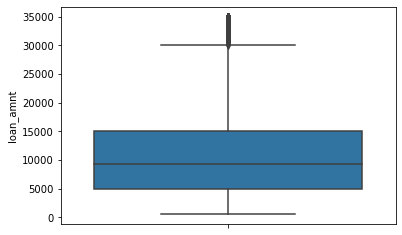

In [151]:
# Using Box Plot to detect outliers
# lc.loan_amnt.plot.box()
boxplot('loan_amnt')







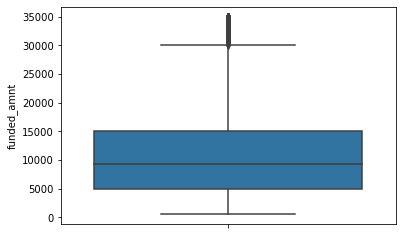

In [152]:
boxplot('funded_amnt')

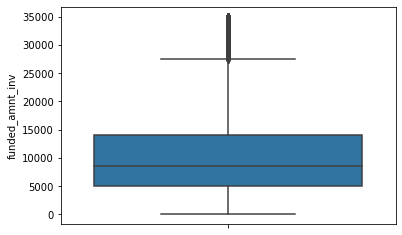

In [153]:
boxplot('funded_amnt_inv')

In [154]:
#remove the outlier for loan amount funded amount and funded_amnt_inv

lc = lc[lc['loan_amnt'] < 30000]
#  funded amount and funded_amnt_inv
lc = lc[lc['funded_amnt'] < 30000]

lc = lc[lc['funded_amnt_inv'] < 27500]

lc.shape

(34756, 23)

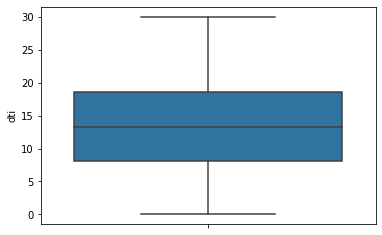

In [155]:
#'dti'

boxplot('dti')
#box plot of dti looks good

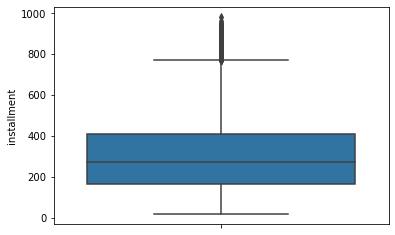

In [156]:
# Boxplot for 'installment'
boxplot( 'installment')


In [157]:
#remove outlier for installment
lc = lc[lc['installment'] < 771]
lc.shape

(33744, 23)

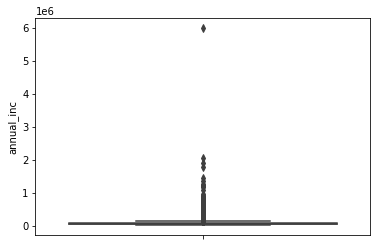

In [158]:
#Boxplot for annual_inc
boxplot('annual_inc')



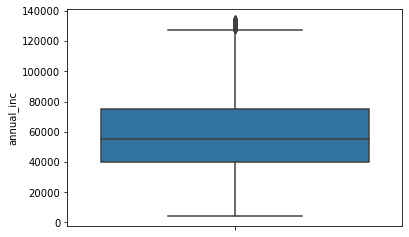

In [159]:
#remove outlier
lc = lc[lc['annual_inc'] < 135000]
boxplot('annual_inc')

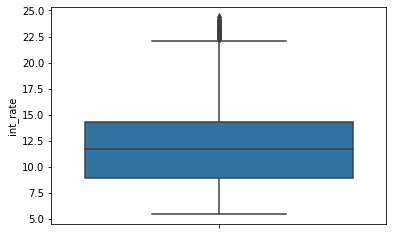

In [160]:
boxplot('int_rate')

## Univariate Analysis

In [161]:

def histd(name, title):
#     fig = px.histogram(lc, x=name, color="loan_status", title=title)
#     fig.show(renderer="colab")
    sns.histplot(data=lc, x=name, hue="loan_status", bins=2)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


    
def barplot(lcd, x, y):
#     plt.figure(figsize=(10,16))
#     sns.barplot(x=x, y=y, data=lcd)
#     plt.show()
#     fig = px.bar(lcd, x=x, y=y, color=x, color_discrete_sequence=['red', 'blue', 'green', 'orange','gray','yellow'])
#     fig.show(renderer="colab")
    sns.countplot(data=lcd, x=x, hue=x)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


    
# def histdper(name, title):
#     fig = px.histogram(lc, x=name, color="loan_status", title=title, histnorm='percent' )
#     fig.show(renderer="colab")
    

###### Analyze LoanStatus

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


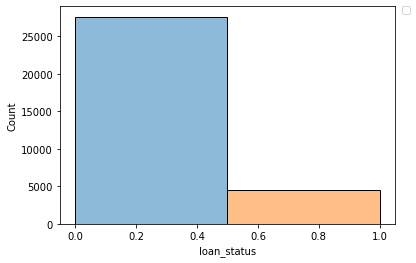

In [162]:
histd('loan_status', 'Frequency Of Loan Status')

In [163]:
# %age of default loan
round(np.mean(lc['loan_status']), 2)

0.14

### Insight: As per above histogram the number of fully paid loan is higher as compared to default loans. But still the charged-off loan percentage(14%) is a bit high.

In [164]:
round(np.mean(lc['loan_status']), 2)

0.14

In [165]:
lc.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'grade_c', 'sub_grade_c',
       'Year', 'Month'],
      dtype='object')

In [166]:
#default loan records
lcd = lc[lc['loan_status']==1]
lcd.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,grade_c,sub_grade_c,Year,Month
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,1,car,GA,1.00,1,1,2011,12
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,2011-12-01,1,small_business,CA,5.55,4,7,2011,12
9,1071570,1306721,5375,5375,5350.0,60,12.69,121.45,B,B5,0,RENT,15000.0,Verified,2011-12-01,1,other,TX,18.08,0,4,2011,12
12,1064687,1298717,9000,9000,9000.0,36,13.49,305.38,C,C1,0,RENT,30000.0,Source Verified,2011-12-01,1,debt_consolidation,VA,10.08,1,3,2011,12
14,1069057,1303503,10000,10000,10000.0,36,10.65,325.74,B,B2,3,RENT,100000.0,Source Verified,2011-12-01,1,other,CA,7.06,0,0,2011,12


## Analyze Loan Amount

In [167]:
# Since Loan_amount is a conitneous variable , binning is required to do univariate analysis. 
# As we can see from the box plot, 
# most of the datapoints are between 5k and 15k.
# low < 5k, 5k<= mid < 15k, 15k <= high < 25k and very high if > 25k
def loan_amount_binning(amt):
    if amt < 5000:
        return 'low'
    elif amt >=5000 and amt < 15000:
        return 'medium'
    elif amt >= 15000 and amt < 25000:
        return 'high'
    else:
        return 'very high'
    
lc['loan_amnt_c'] = lc.loan_amnt.apply(lambda x : loan_amount_binning(x))
    

medium       18865
low           6939
high          5928
very high      446
Name: loan_amnt_c, dtype: int64

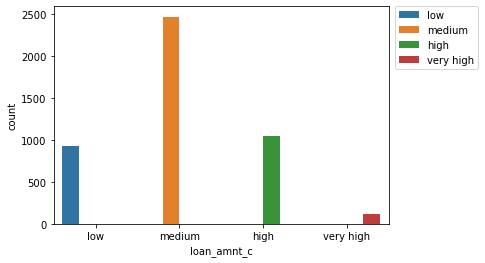

In [168]:
lcd = lc[lc['loan_status']==1]
barplot(lcd, 'loan_amnt_c', 'loan_status')
lc['loan_amnt_c'].value_counts()

### Observation
### <span style="color:red">Higher the loan amount is more the risk of default. And medium and high ranged loans are more prone to default</span> 

### Analyze Funded Amount And Funded Amount Invested


medium       18865
low           6939
high          5928
very high      446
Name: funded_amnt_c, dtype: int64

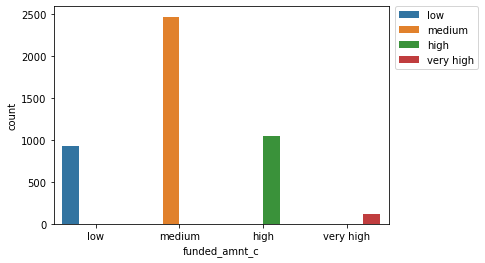

In [169]:
lc['funded_amnt_c'] = lc.funded_amnt.apply(lambda x : loan_amount_binning(x))
lcd = lc[lc['loan_status']==1]
barplot(lcd, 'funded_amnt_c', 'loan_status')
lc['funded_amnt_c'].value_counts()

medium       18652
low           8545
high          4839
very high      142
Name: funded_amnt_inv_c, dtype: int64

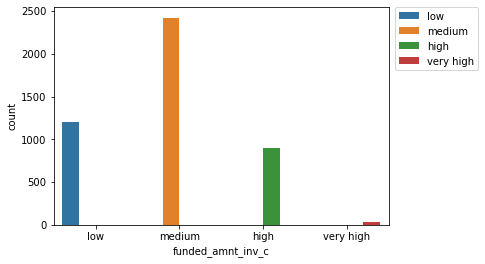

In [170]:
lc['funded_amnt_inv_c'] = lc.funded_amnt_inv.apply(lambda x : loan_amount_binning(x))
lcd = lc[lc['loan_status']==1]
barplot(lcd, 'funded_amnt_inv_c', 'loan_status')
lc['funded_amnt_inv_c'].value_counts()

### Observation
#### Since funded amount and funded amount invested is highly related to loan amount, it would have simillar kind of insights. Higher the amount is more prone to default

### Analyze Term

36    2727
60    1836
Name: term, dtype: int64

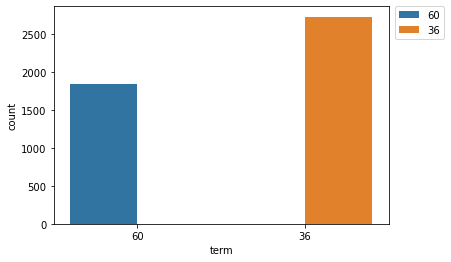

In [171]:
barplot(lcd, 'term', 'loan_status')
lcd.term.value_counts()


### Observation
#### <span style="color:red"> Lesser the tenure is more prone to default</span>

### Analyze Interest Rate


In [172]:
def int_rate_binning(amt):
    if amt <= 10:
        return 'low'
    elif amt > 10 and amt <=15:
        return 'medium'
    else:
        return 'high'

medium    2258
high      1610
low        695
Name: int_rate_c, dtype: int64

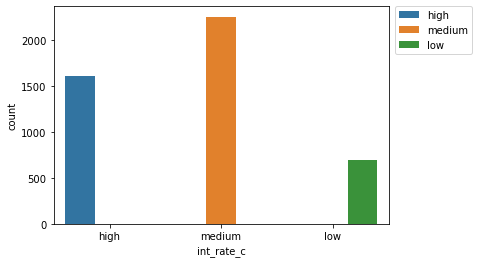

In [173]:
lc['int_rate_c'] = lc.int_rate.apply(lambda x : int_rate_binning(x))
lcd = lc[lc['loan_status']==1] 
barplot(lcd, 'int_rate_c', 'loan_status')
lcd.int_rate_c.value_counts()

### Observation
#### <span style="color:red"> Default rate increases with interest rate</span>

### Analyze Installment


In [174]:

def installments_binning(amt):
    if amt <= 160:
        return 'low'
    elif amt > 160 and amt <=390:
        return 'medium'
    elif amt > 390 and amt <=720:
        return 'high'
    else:
        return 'very high'

very high    4507
low            31
high           16
medium          9
Name: installment_c, dtype: int64

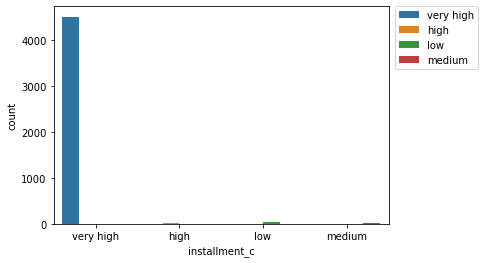

In [175]:

lc['installment_c'] = lc.funded_amnt_inv.apply(lambda x : installments_binning(x))
lcd = lc[lc['loan_status']==1] 
barplot(lcd, 'installment_c', 'loan_status')
lcd.installment_c.value_counts()

### Observation
#### <span style="color:red"> Higher the installments higher the number of defaults</span>


### Analyze Grade


In [176]:
def barplot_grade(lcd, x, y, categ_arr):
#     sns.barplot(x=cat, y=md, data=lcd)
#     plt.show()
    fig = px.bar(lcd, x=x, y=y, color=x, color_discrete_sequence=['red', 'blue', 'green', 'orange','gray','yellow'])
    fig.update_layout(barmode='stack',  xaxis={'categoryorder':'array', 'categoryarray':categ_arr})
    fig.show()

B    1161
C    1147
D     931
E     526
A     517
F     207
G      74
Name: grade, dtype: int64

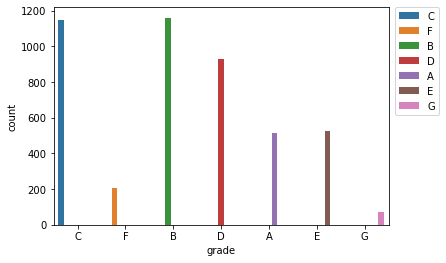

In [177]:
categ_arr = sorted(lcd.grade.unique(), reverse=True)
barplot(lcd, 'grade', 'loan_status')

lcd.grade.value_counts()

### Observation
#### <span style="color:red"> Higher the grade higher the number of defaults</span>


### Analyze Sub Grade

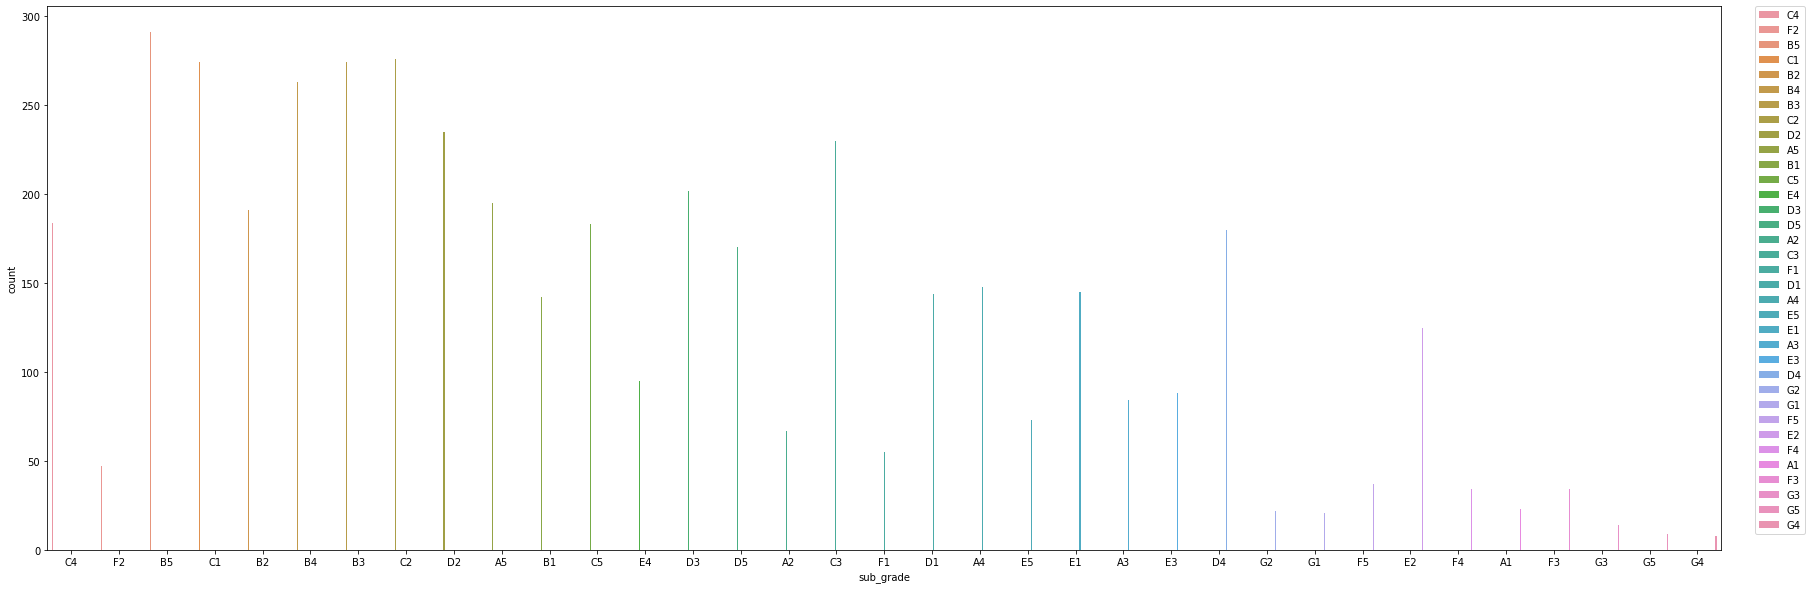

In [178]:
categ_arr = sorted(lcd.sub_grade.unique(), reverse=False)
plt.figure(figsize=(30, 10))
barplot(lcd, 'sub_grade', 'loan_status')

### Observation
#### SubGrade does not matter a lot for low level grades. But High Grades like A, it has A1 is better as compared to A2 and A3

### Analyze emp_length

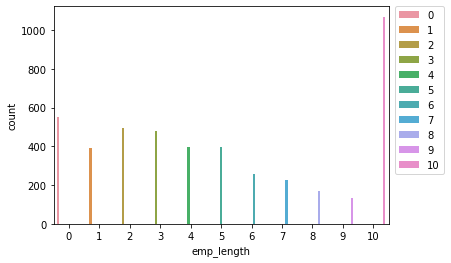

In [179]:
barplot(lcd, 'emp_length', 'loan_status')



### Observation
#### Emp Length more than 10 years or less than 2 years of experience has high default rate

### Analyze home_ownership

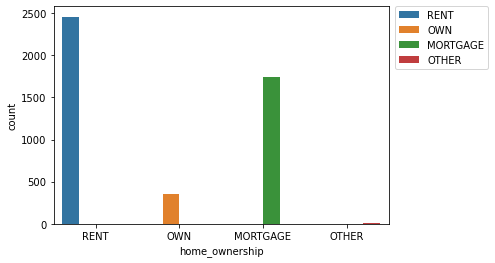

In [180]:

barplot(lcd, 'home_ownership', 'loan_status')


### Observation
#### <span style="color:red"> Rented Applicants have high number of defaults</span>


### Analyze verification_status

Not Verified       1884
Verified           1438
Source Verified    1241
Name: verification_status, dtype: int64

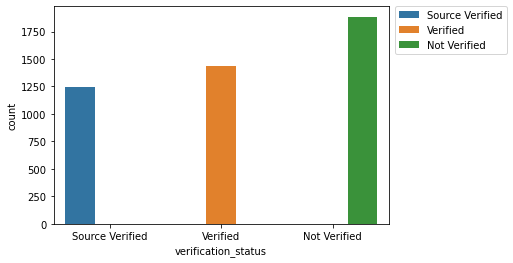

In [181]:
barplot(lcd, 'verification_status', 'loan_status')
lcd.verification_status.value_counts()

### Observation
#### <span style="color:red"> Verified applicants(Verified and Source Verified  ) have high number of defaults</span>

debt_consolidation    2250
other                  516
credit_card            421
small_business         356
home_improvement       266
major_purchase         188
car                    151
medical                 95
wedding                 82
moving                  81
vacation                48
house                   47
educational             46
renewable_energy        16
Name: purpose, dtype: int64

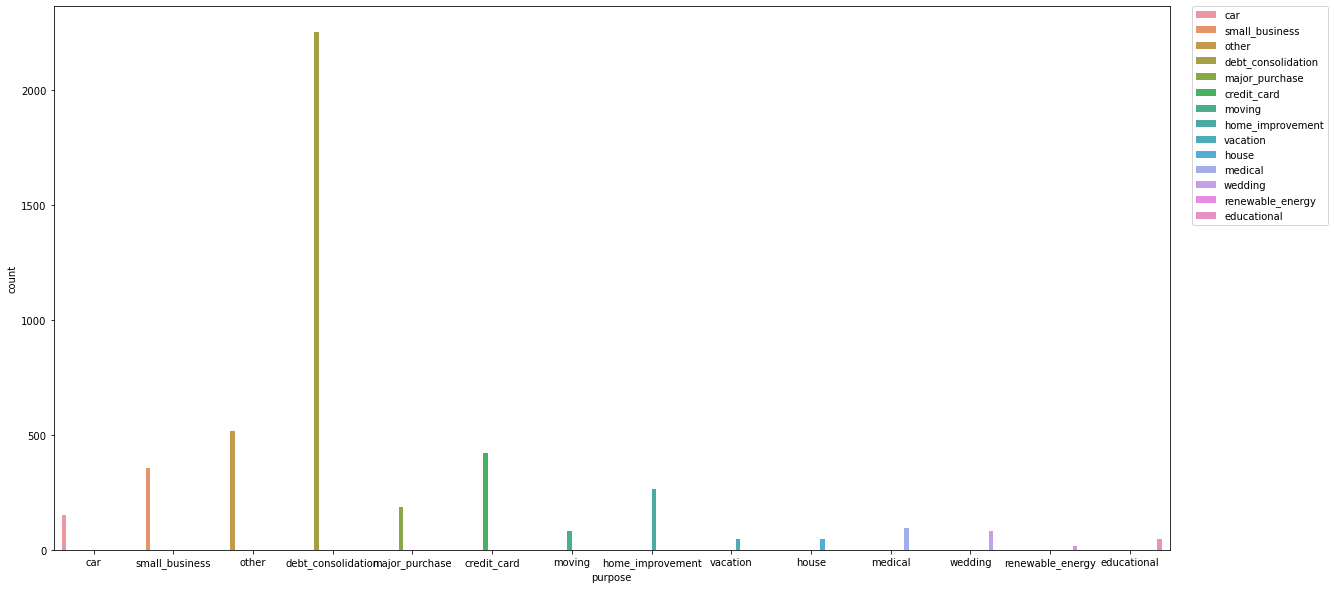

In [200]:
#### Analyze Purpose
plt.figure(figsize=(20, 10))

barplot(lcd, 'purpose', 'loan_status')
lcd.purpose.value_counts()

## Observation
#### <span style="color:red"> debt_consolidation, credit_card, small_business, home_improvement and major_purchase purpose loans have the high default rate respectively  </span>

### Analyze by Year

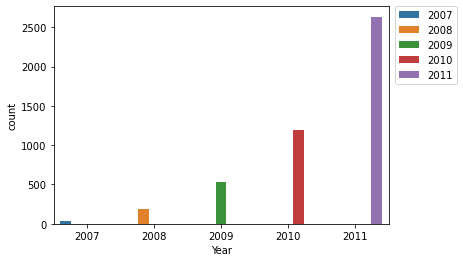

In [183]:
barplot(lcd, 'Year', 'loan_status')


### Observation
#### <span style="color:red"> Clearly default rate increases with the year </span>

### Analyze by Month

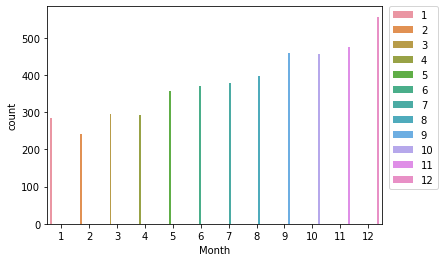

In [184]:
barplot(lcd, 'Month', 'loan_status')


### Observation
#### <span style="color:red"> December has the highest default rate </span>

### Analyze Annual Income

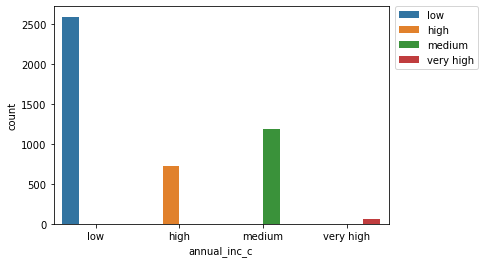

In [185]:
# boxplot('annual_inc')
# annual income
def annual_income(amt):
    if amt <= 54000:
        return 'low'
    elif amt > 54000 and amt <=75000:
        return 'medium'
    elif amt > 75000 and amt <=120000:
        return 'high'
    else:
        return 'very high'

lc['annual_inc_c'] = lc['annual_inc'].apply(lambda x: annual_income(x))
lcd = lc[lc['loan_status']==1]
barplot(lcd, 'annual_inc_c', 'loan_status')


### Observation
#### <span style="color:red"> Lower the income has the higher default rate </span>

### Analyze debt to income ratio

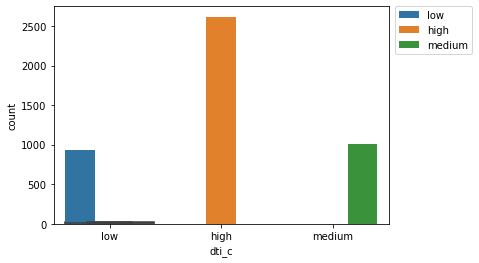

In [186]:
boxplot( 'dti')

# debt to income ratio
def dti(rt):
    if rt <= 8:
        return 'low'
    elif rt > 8 and rt <=13:
        return 'medium'
    else:
        return 'high'
    

lc['dti_c'] = lc['dti'].apply(lambda x: dti(x))
lcd = lc[lc['loan_status']==1]
barplot(lcd, 'dti_c', 'loan_status')


### Obeservation
##### <span style="color:red"> Higher the dti has the higher default rate </span>

# Segmented Univariate Analysis

##### The default rate varies highly on the purpose of loan. And since different kinds of loan behaves differntly, let's do segmented analysis using purpose variable  for important variables  like loan_amt, int_rate, grade, annual_inc, dti etc

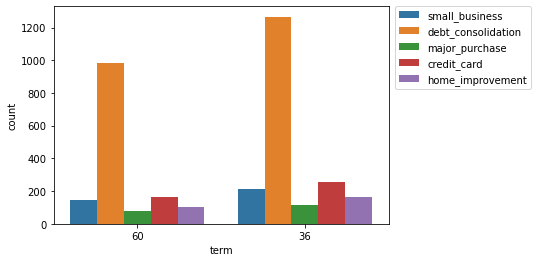

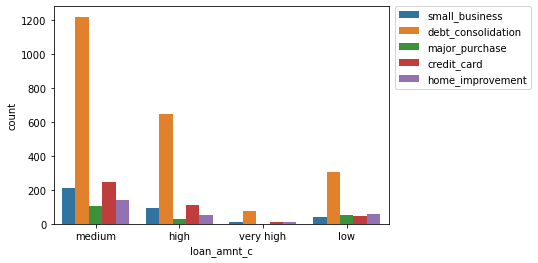

In [208]:
# segmented by purpose 
# from plotly.graph_objs import *

# def bar_plot_segment_analysis(cat_var, lcd):
#       fig = px.bar(lcd,  x=cat_var, y="loan_status", color="purpose", barmode="group")
# #       fig.update_layout(height=300, paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")
#       fig.show()
    
def bar_plot_segment_analysis(cat_var, lcd):
    sns.countplot(data=lcd, x=cat_var, hue="purpose")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()
#       fig = px.bar(lcd,  x=cat_var, y="loan_status", color="purpose", barmode="group")
#       fig.update_layout(height=300, paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")
#       fig.show()

lcs = lcd[lcd['purpose'].isin(['debt_consolidation', 'credit_card', 'small_business', 'home_improvement' , 'major_purchase'])]

#Compare default rates for different terms across top five purpose
bar_plot_segment_analysis('term', lcs)

# print(lcs.columns)

#Compare default rates for different loan_amount_range across top five purpose
bar_plot_segment_analysis('loan_amnt_c', lcs)

# ?px.bar

#### Loan Amount has high significance

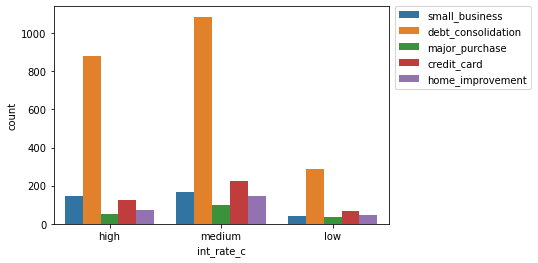

In [188]:
#Compare default rates for different interest rate range across top five purpose
bar_plot_segment_analysis('int_rate_c', lcs)



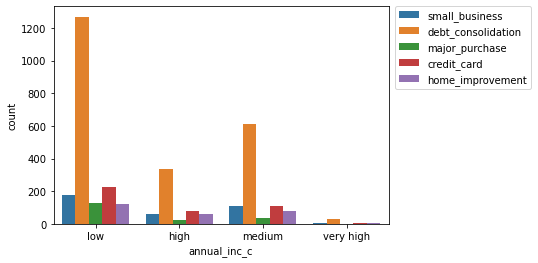

In [189]:
#Compare default rates for different annual income range across top five purpose
bar_plot_segment_analysis('annual_inc_c', lcs)



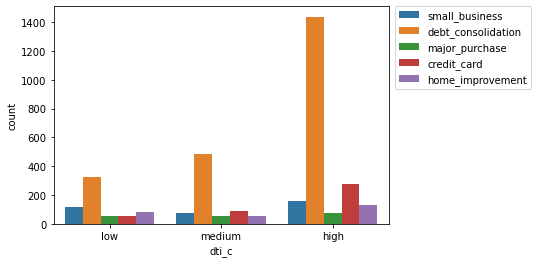

In [190]:
#Compare default rates for different debt to income ratio across top five purpose
bar_plot_segment_analysis('dti_c', lcs)



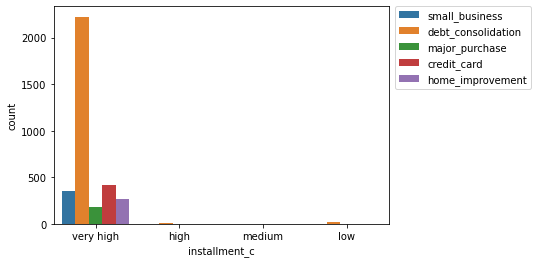

In [191]:
#Compare default rates for different installment range across top five purpose
bar_plot_segment_analysis('installment_c', lcs)



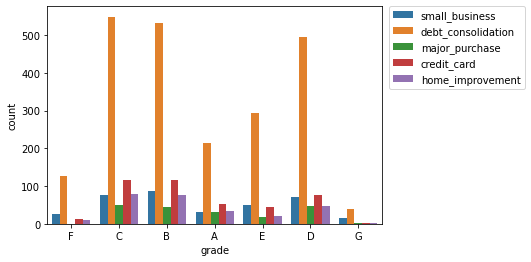

In [209]:
#Compare default rates for different grade across top five purpose
bar_plot_segment_analysis('grade', lcs)



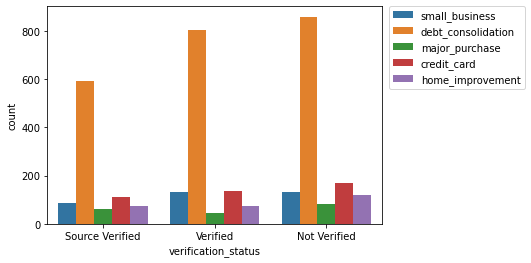

In [193]:
#Compare default rates for different verification_status across top five purpose
bar_plot_segment_analysis('verification_status', lcs)



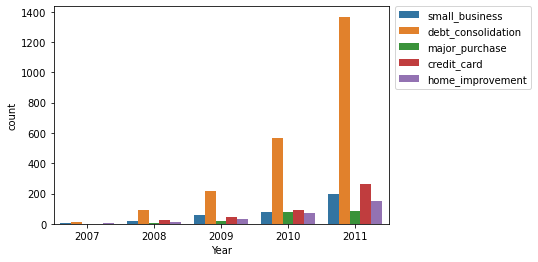

In [194]:
#Compare default rates for different year across top five purpose
bar_plot_segment_analysis('Year', lcs)




In [195]:
lcs[lcs['Year']==2007].purpose.value_counts()


debt_consolidation    12
small_business         5
home_improvement       2
major_purchase         1
credit_card            1
Name: purpose, dtype: int64

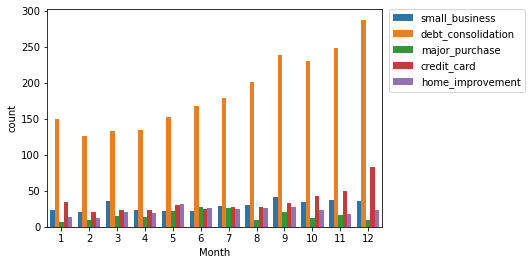

In [196]:
#Compare default rates for different month across top five purpose
bar_plot_segment_analysis('Month', lcs)

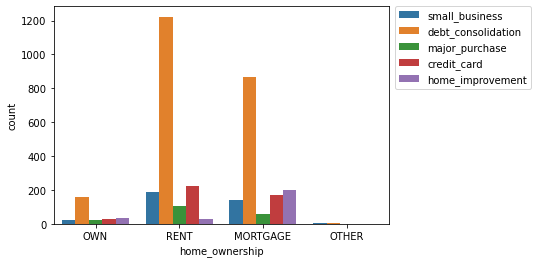

In [197]:
#Compare default rates for different month across top five purpose
bar_plot_segment_analysis('home_ownership', lcs)
# lcs.columns

# Observations

<li>
    <span> debit_consolidstion loan type has a higher default rate irrespective of other important variable like annual income, Year, Month, verification status</span>
</li>

<li>Default Rate is increasing with year irrespective of purpose of loan</li>

<li>More number of defaulter in mid range interest rate</li>
<li> Verified loans has less default rate for all the pupose except debit_consolidstion loan </li>

<li> Very high installments loans have high default rate


## Bivariate Analysis

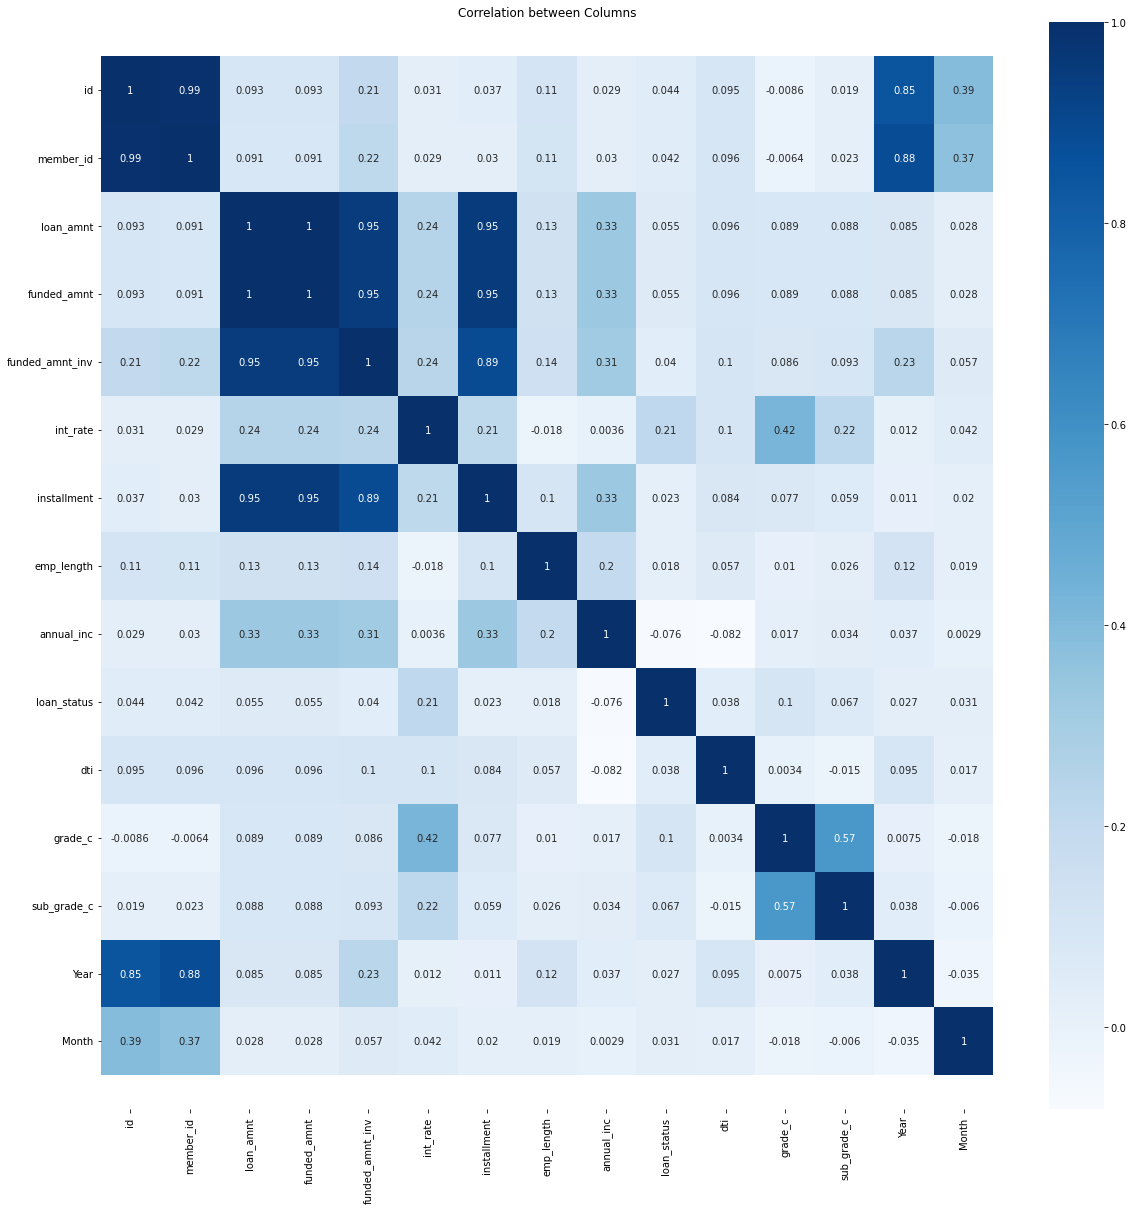

In [206]:
#Finding correlation matric
corr_matrix = lc.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

## Observation
#### Interest Rate And Grade is highly correlated to loan status. 
#### Loan Amount And Funded Amount is also highly correlated as an oobivious one

## Summary

#### Debt consolidation  - Term, Grade, Interest Rate, Loan Amount impact a lot to default rate for debt consolidation
#### Credit card - Grade , Interest Rate, Loan Amount , Debt To Income Ratio impact a lot to default rate for Credit card
#### small business – DTI,  Interest Rate, Annual Income  and Home Ownership impact a lot to default rate for small business
#### home improvement  -  Home Ownership , annual income, interest rate and term impact a lot to default rate for home improvement . And interestingly mortgage home owners have high default rate
#### major purchase – Interest Rate, Term and Grade are key variables for high default rate of major purchase loan
